# Import một số thư viện cần thiết

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import os
import math
import preprocessing_module as pre


# Load data

In [44]:
data1 = pd.read_excel("../dataset/raw-data/negative_data.xlsx")
data2 = pd.read_excel("../dataset/raw-data/neutral_data.xlsx")
data3 = pd.read_excel("../dataset/raw-data/positive_data.xlsx")

In [45]:
data = pd.concat([data1, data2, data3])

In [46]:
data

,Rate,Review,Label
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1
...,...,...,...
6936,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1
6937,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1
6938,7.2,Vị trí: mặt tiền nên ko khó tìm cho lắm nhưng ...,1
6939,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1


In [47]:
# data = pd.DataFrame(columns=['Review', 'Label'])
# for comment in merge_data['Review']:
#     sentences = pre.extract_sectence_from_paragraph(comment)
#     for sentence in sentences:
#         data = data.append({'Review': sentence}, ignore_index=True)
# data.to_excel("../dataset/raw-data/data.xlsx")

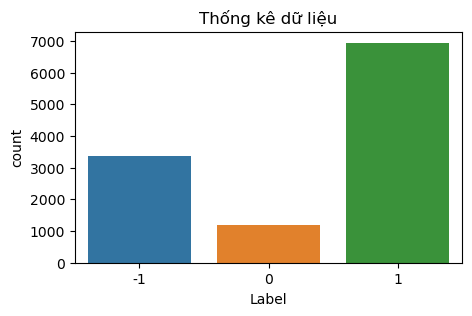

In [48]:
plt.figure(figsize=(5,3))
sb.countplot(data=data, x="Label").set_title('Thống kê dữ liệu')
plt.show()

In [49]:
data["Label"].value_counts()

 1    6941
-1    3377
 0    1176
Name: Label, dtype: int64

In [50]:
def sentence_len(text):
  return len(text.split(' '));

df_len_headline = data["Review"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của bình luận trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của bình luận trong bộ dữ liệu: 69 từ


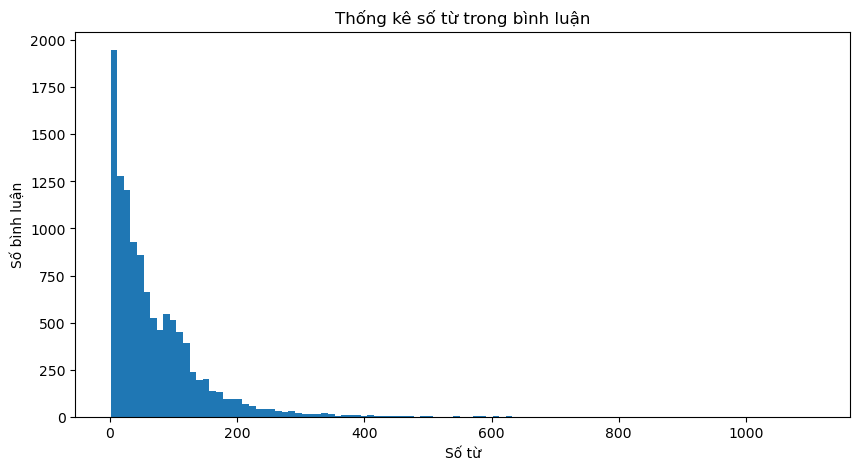

In [51]:
plt.figure(figsize=(10, 5))
plt.title("Thống kê số từ trong bình luận")
plt.xlabel('Số từ')
plt.ylabel('Số bình luận')
plt.hist(np.array(df_len_headline), bins=int(math.sqrt(len(df_len_headline))));

# Một số bước tiền xử lý

In [52]:
def preprocessing_text(text):
    # Chuẩn hóa unicode và dấu câu
    text = pre.convert_unicode(text)

    # Đưa tất cả câu về dạng viết thường
    text = pre.to_lower_case(text)

    # Xóa các ký tự không cần thiết
    text = pre.remove_unnecessary_charactor(text)

    # Chuẩn hóa từ viết tắt
    text = pre.abbreviate(text, "./abbreviations.txt")

    # xóa khoảng trắng thừa
    text = pre.re.sub(r'\s+', ' ', text).strip()

    # Chuẩn hóa những từ lặp âm tiết
    text = pre.remove_duplicate_characters(text)

    # Tách từ tiếng Việt (theo từ đơn từ ghép)
    text = pre.word_tokenize(text, format='text')

    return text


In [53]:
data["Preprocess_Review"] = data["Review"].apply(lambda x: preprocessing_text(x))
data

,Rate,Review,Label,Preprocess_Review
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1,mình thề là mình không_thể cảm nổi đồ ăn ở aeo...
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1,đôi khi thèm lên là bất_chấp nắng nóng phi và ...
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1,ngõ treo biển cafe trứng đúng kiểu phố cổ hà_n...
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1,mình thấy địa_chỉ cafe giảng ở nguyễn_hữu_huân...
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1,mình là người hà_nội và cũng cực_kỳ khó_tính t...
...,...,...,...,...
6936,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1,mình mới đến quán lần và cảm_thấy quán khá dễ ...
6937,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1,quán ăn đồ hàn mới mở ở gần trường mình nên bữ...
6938,7.2,Vị trí: mặt tiền nên ko khó tìm cho lắm nhưng ...,1,vị_trí mặt_tiền nên không khó tìm cho lắm nhưn...
6939,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1,trà sữa dưa lưới y_như gu mình thích tuy vẫn c...


In [54]:
data.drop_duplicates(inplace=True)
data

,Rate,Review,Label,Preprocess_Review
0,4.0,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1,mình thề là mình không_thể cảm nổi đồ ăn ở aeo...
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1,đôi khi thèm lên là bất_chấp nắng nóng phi và ...
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1,ngõ treo biển cafe trứng đúng kiểu phố cổ hà_n...
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1,mình thấy địa_chỉ cafe giảng ở nguyễn_hữu_huân...
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1,mình là người hà_nội và cũng cực_kỳ khó_tính t...
...,...,...,...,...
6936,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1,mình mới đến quán lần và cảm_thấy quán khá dễ ...
6937,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1,quán ăn đồ hàn mới mở ở gần trường mình nên bữ...
6938,7.2,Vị trí: mặt tiền nên ko khó tìm cho lắm nhưng ...,1,vị_trí mặt_tiền nên không khó tìm cho lắm nhưn...
6939,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1,trà sữa dưa lưới y_như gu mình thích tuy vẫn c...


# Lưu dữ liệu đã tiền xử lý

In [55]:
data.to_excel("../dataset/final_data1.xlsx", index=False)

# Xử lý stopword

*"Stop word"* là những từ phổ biến trong bất kỳ ngỗn ngữ và thường không mang ý nghĩa nhiều, thường bị NLP bỏ qua. Các từ này thường được xóa khỏi văn bản trước khi nó được xử lý để phân tích. Điều này đợc thực hiện để giảm kích thước của văn bản và để tránh thông tin không liên quan.

**Khi nào thì xóa Stopword:**

Nếu chúng ta đang giải quyết các vấn đề như phân loại văn bản, phân tích tình cảm, thì chúng ta nên loại bỏ các stopword vì chúng không cung cấp các thoog tin liên quan cho mô hình. Nhưng nếu chúng ta đang giải quyết vấn đề như dịch máy thì các stopword có thể hữu ích, vì chúng phải được dịch với các từ khác.

In [56]:
data["Preprocess_Review"] = data["Preprocess_Review"].apply(lambda x: pre.remove_stopwords(x, path = "./stopword.txt"))

Lưu kết quả

In [57]:
data.to_excel("../dataset/final_data2.xlsx", index=False)

# Thống kê dữ liệu 

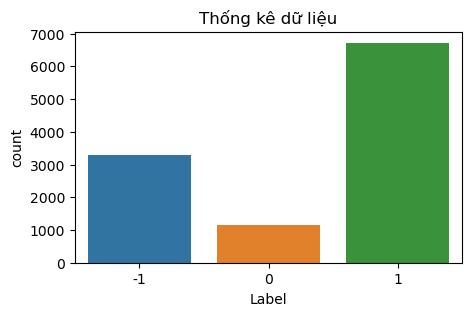

In [58]:
plt.figure(figsize=(5,3))
sb.countplot(data=data, x="Label").set_title('Thống kê dữ liệu')
plt.show()

In [59]:
data["Label"].value_counts()

 1    6723
-1    3278
 0    1164
Name: Label, dtype: int64

In [60]:
df_len_comment = data["Preprocess_Review"].apply(lambda text: sentence_len(text))
print('Độ dài trung bình của bình luận trong bộ dữ liệu:', int(np.mean(df_len_headline)), 'từ')

Độ dài trung bình của bình luận trong bộ dữ liệu: 69 từ


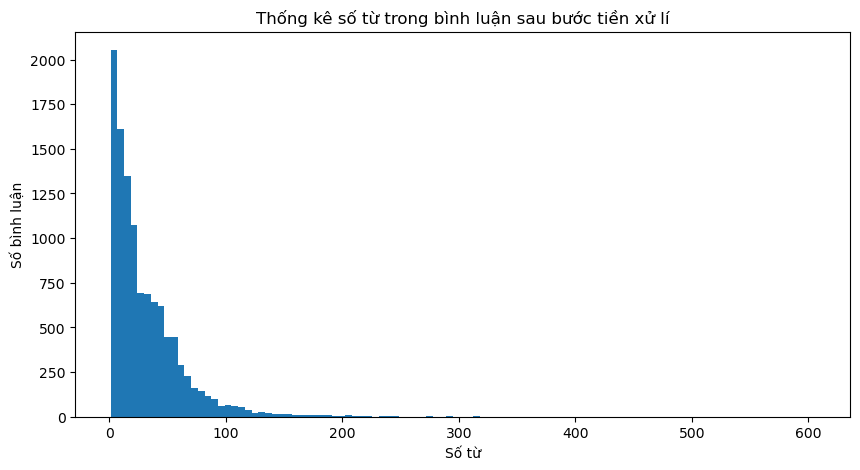

In [62]:
plt.figure(figsize=(10, 5))
plt.title("Thống kê số từ trong bình luận sau bước tiền xử lí")
plt.xlabel('Số từ')
plt.ylabel('Số bình luận')
plt.hist(np.array(df_len_comment), bins=int(math.sqrt(len(df_len_comment))));